In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Clearned Dataset
fname = "titanic_cleaned.csv"
df = pd.read_csv(fname) 

In [4]:
df.shape

(891, 16)

In [5]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_ind        0
New_fare         0
Family_Cnt       0
dtype: int64

In [6]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,New_fare,Family_Cnt
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,7.2500,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,53.1000,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,8.0500,0


In [7]:
#Check for multi-collinearity
cormat = df.corr()
round(cormat,2)

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,New_fare,Family_Cnt
Unnamed: 0,1.00,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01,0.02,0.01,-0.04
PassengerId,1.00,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01,0.02,0.01,-0.04
Survived,-0.01,-0.01,1.00,-0.34,-0.07,-0.04,0.08,0.26,0.32,0.31,0.02
Pclass,-0.04,-0.04,-0.34,1.00,-0.33,0.08,0.02,-0.55,-0.73,-0.70,0.07
Age,0.03,0.03,-0.07,-0.33,1.00,-0.23,-0.18,0.09,0.23,0.13,-0.25
SibSp,-0.06,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16,-0.04,0.25,0.89
Parch,-0.00,-0.00,0.08,0.02,-0.18,0.41,1.00,0.22,0.04,0.26,0.78
Fare,0.01,0.01,0.26,-0.55,0.09,0.16,0.22,1.00,0.48,0.85,0.22
Cabin_ind,0.02,0.02,0.32,-0.73,0.23,-0.04,0.04,0.48,1.00,0.61,-0.01
New_fare,0.01,0.01,0.31,-0.70,0.13,0.25,0.26,0.85,0.61,1.00,0.30


In [8]:
#Select only required classes and separate dependent & independent variables
cols_needed = ['Pclass', 'Sex','Age','Embarked', 'Cabin_ind','New_fare','Family_Cnt']
X = df[cols_needed]
y = df['Survived']

In [9]:
#Create dummies for qualitative variables
X = pd.get_dummies(X, columns = ['Pclass','Sex','Embarked'])

In [10]:
X.head()

,Age,Cabin_ind,New_fare,Family_Cnt,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,7.2500,1,0,0,1,0,1,0,0,1
1,38.0,1,71.2833,1,1,0,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,0,1,1,0,0,0,1
3,35.0,1,53.1000,1,1,0,0,1,0,0,0,1
4,35.0,0,8.0500,0,0,0,1,0,1,0,0,1


In [11]:
#Remove gender female, as gender-male is enough
X.drop('Sex_female', axis =1, inplace = True)

In [12]:
X.head()

,Age,Cabin_ind,New_fare,Family_Cnt,Pclass_1,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,7.2500,1,0,0,1,1,0,0,1
1,38.0,1,71.2833,1,1,0,0,0,1,0,0
2,26.0,0,7.9250,0,0,0,1,0,0,0,1
3,35.0,1,53.1000,1,1,0,0,0,0,0,1
4,35.0,0,8.0500,0,0,0,1,1,0,0,1


In [13]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [14]:
#Check the shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 11)
(712,)
(179, 11)
(179,)


In [15]:
179/(712+179)

0.20089786756453423

In [16]:
#load Logistic Regression
from sklearn.linear_model import LogisticRegression

In [17]:
#Fit logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [18]:
#Check co-efficients 
lr_model.coef_

array([[-0.03114064,  0.73286942,  0.00778619, -0.22832833,  0.71914493,
         0.68873622, -0.33407659, -2.64087289,  0.55301123,  0.63121866,
        -0.11042533]])

In [19]:
#Look at the intercept
lr_model.intercept_

array([1.61245828])

In [20]:
#predict for test data
predictions = lr_model.predict(X_test)

In [21]:
predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [22]:
#If you want probability
lr_model.predict_proba(X_test)

array([[0.83142761, 0.16857239],
       [0.76668389, 0.23331611],
       [0.91741344, 0.08258656],
       [0.16162003, 0.83837997],
       [0.09300499, 0.90699501],
       [0.06020891, 0.93979109],
       [0.9843193 , 0.0156807 ],
       [0.9843193 , 0.0156807 ],
       [0.17175929, 0.82824071],
       [0.22562043, 0.77437957],
       [0.87378631, 0.12621369],
       [0.70816501, 0.29183499],
       [0.19505277, 0.80494723],
       [0.92194122, 0.07805878],
       [0.86980035, 0.13019965],
       [0.27208238, 0.72791762],
       [0.7423247 , 0.2576753 ],
       [0.26499741, 0.73500259],
       [0.90722341, 0.09277659],
       [0.84506576, 0.15493424],
       [0.82280027, 0.17719973],
       [0.84264501, 0.15735499],
       [0.89044861, 0.10955139],
       [0.91298871, 0.08701129],
       [0.81532616, 0.18467384],
       [0.74809159, 0.25190841],
       [0.8134907 , 0.1865093 ],
       [0.89697317, 0.10302683],
       [0.57012313, 0.42987687],
       [0.3595934 , 0.6404066 ],
       [0.

In [23]:
#Check the accuracy of the model
print('training accuracy:', lr_model.score(X_train, y_train))
print('test accuracy:',lr_model.score(X_test, y_test))

training accuracy: 0.8117977528089888
test accuracy: 0.7932960893854749


In [24]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[90 15]
 [22 52]]


<AxesSubplot:>

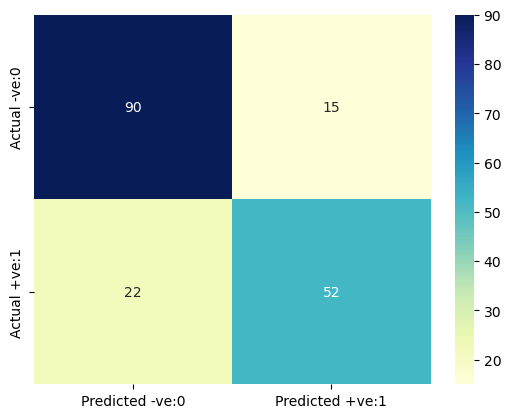

In [25]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'], 
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Evaluation

In [26]:
#Accuracy
(90+52)/(90+15+22+52)

0.7932960893854749

In [27]:
#Precision 
#Out of predicted as Survived, how many were actually survived?
print(52/(52+15))

0.7761194029850746


In [28]:
#Recall
#Out of all the survive, how many were actually survived?
print(52/(52+22))

0.7027027027027027


In [29]:
# Accuracy Score
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, predictions))

0.7932960893854749


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [31]:
#Precision
print(90/(90+22)) #if Not survived is your relevant class
print(52/(52+15)) #if survived is your relevant class

0.8035714285714286
0.7761194029850746


In [32]:
#Recall
print(90/(90+15)) #if Not survived is your relevant class
print(52/(52+22)) #if survived is your relevant class

0.8571428571428571
0.7027027027027027


In [33]:
#Try different Threshold and check precision and recall
prediction_prob = lr_model.predict_proba(X_test)[:,1]
type(prediction_prob)
#predictions_threshold = 
prediction_prob[prediction_prob > 0.8] = 1
prediction_prob[prediction_prob <= 0.8] = 0

In [34]:
print(classification_report(y_test, prediction_prob))
#Recall up, Precicision down

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       105
           1       0.91      0.43      0.59        74

    accuracy                           0.75       179
   macro avg       0.81      0.70      0.70       179
weighted avg       0.79      0.75      0.72       179



In [35]:
#0.2
prediction_prob = lr_model.predict_proba(X_test)[:,1]
type(prediction_prob)
#predictions_threshold = 
prediction_prob[prediction_prob > 0.2] = 1
prediction_prob[prediction_prob <= 0.2] = 0

In [36]:
print(classification_report(y_test, prediction_prob))
#Recall down, precision up

              precision    recall  f1-score   support

           0       0.88      0.65      0.75       105
           1       0.64      0.88      0.74        74

    accuracy                           0.74       179
   macro avg       0.76      0.76      0.74       179
weighted avg       0.78      0.74      0.74       179



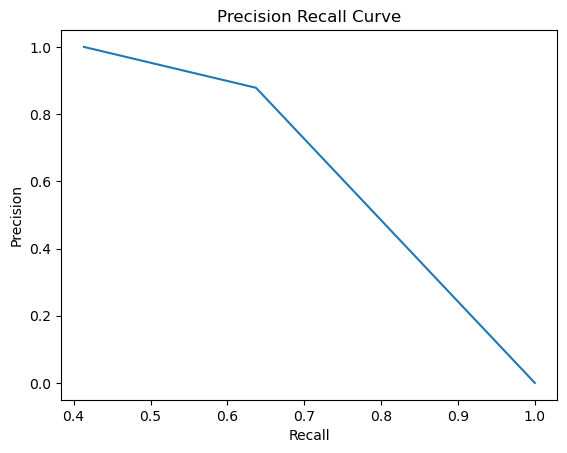

In [37]:
from sklearn.metrics import precision_recall_curve
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, prediction_prob)

# Plot Precision Recall curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

AUC -  0.762998712998713


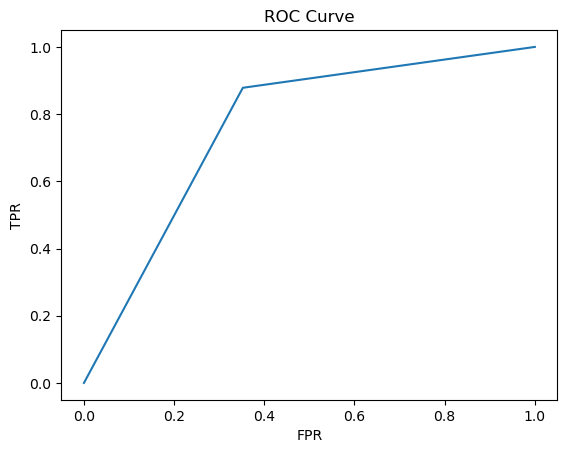

In [38]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("AUC - ",format(roc_auc))
# Plot Precision Recall curve
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# Decision Trees

In [39]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [40]:
ctree = DecisionTreeClassifier(random_state = 0, max_depth = 3)
ctree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [41]:
ctree.classes_

array([0, 1], dtype=int64)

In [42]:
#Print the rules
text_representation = export_text(ctree)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  2.50
|   |   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- feature_2 <= 23.35
|   |   |   |--- class: 1
|   |   |--- feature_2 >  23.35
|   |   |   |--- class: 0
|--- feature_7 >  0.50
|   |--- feature_2 <= 26.27
|   |   |--- feature_0 <= 13.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.50
|   |   |   |--- class: 0
|   |--- feature_2 >  26.27
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: 0



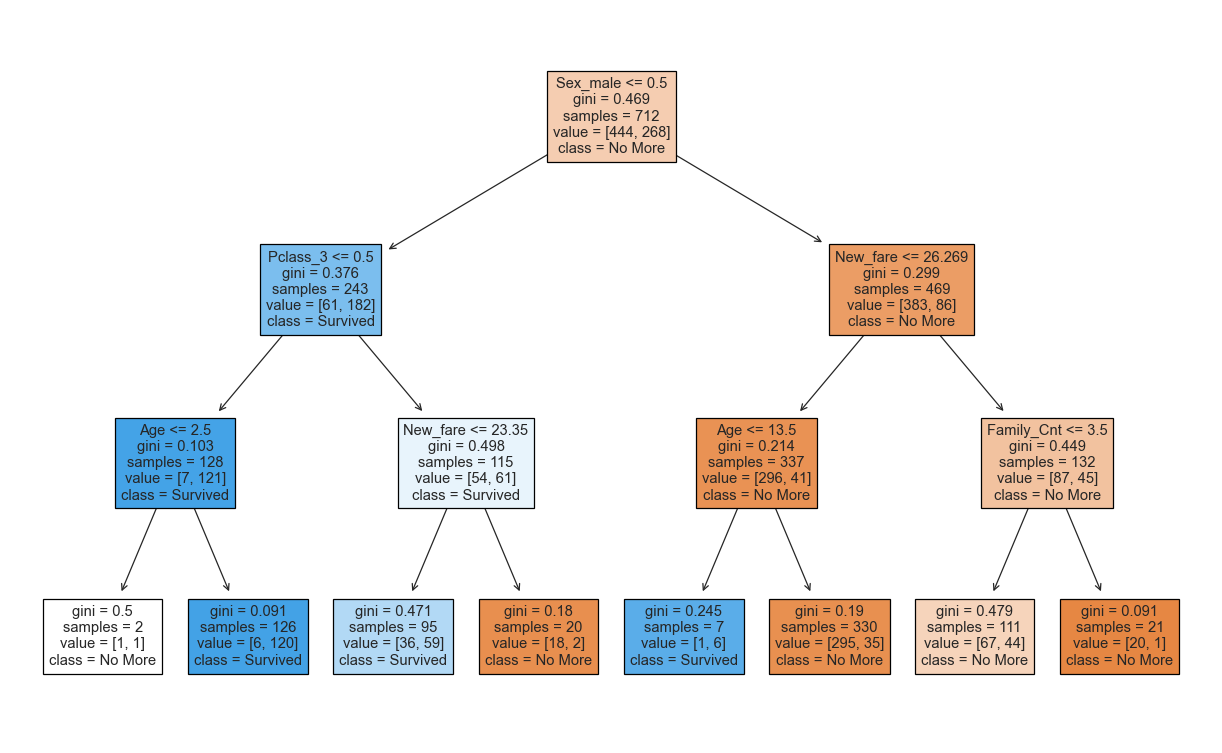

In [43]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(5,3), dpi = 300)
_ = plot_tree(ctree, 
                   feature_names=X.columns,  
                   class_names=['No More', 'Survived'],
                   filled=True)

In [44]:
#predict for test data
predictions = ctree.predict(X_test)

In [45]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.8212290502793296


In [46]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[90 15]
 [17 57]]


In [47]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Full Grown Tree

In [48]:
#Full Grown tree
fulltree = DecisionTreeClassifier(random_state = 0)
fulltree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

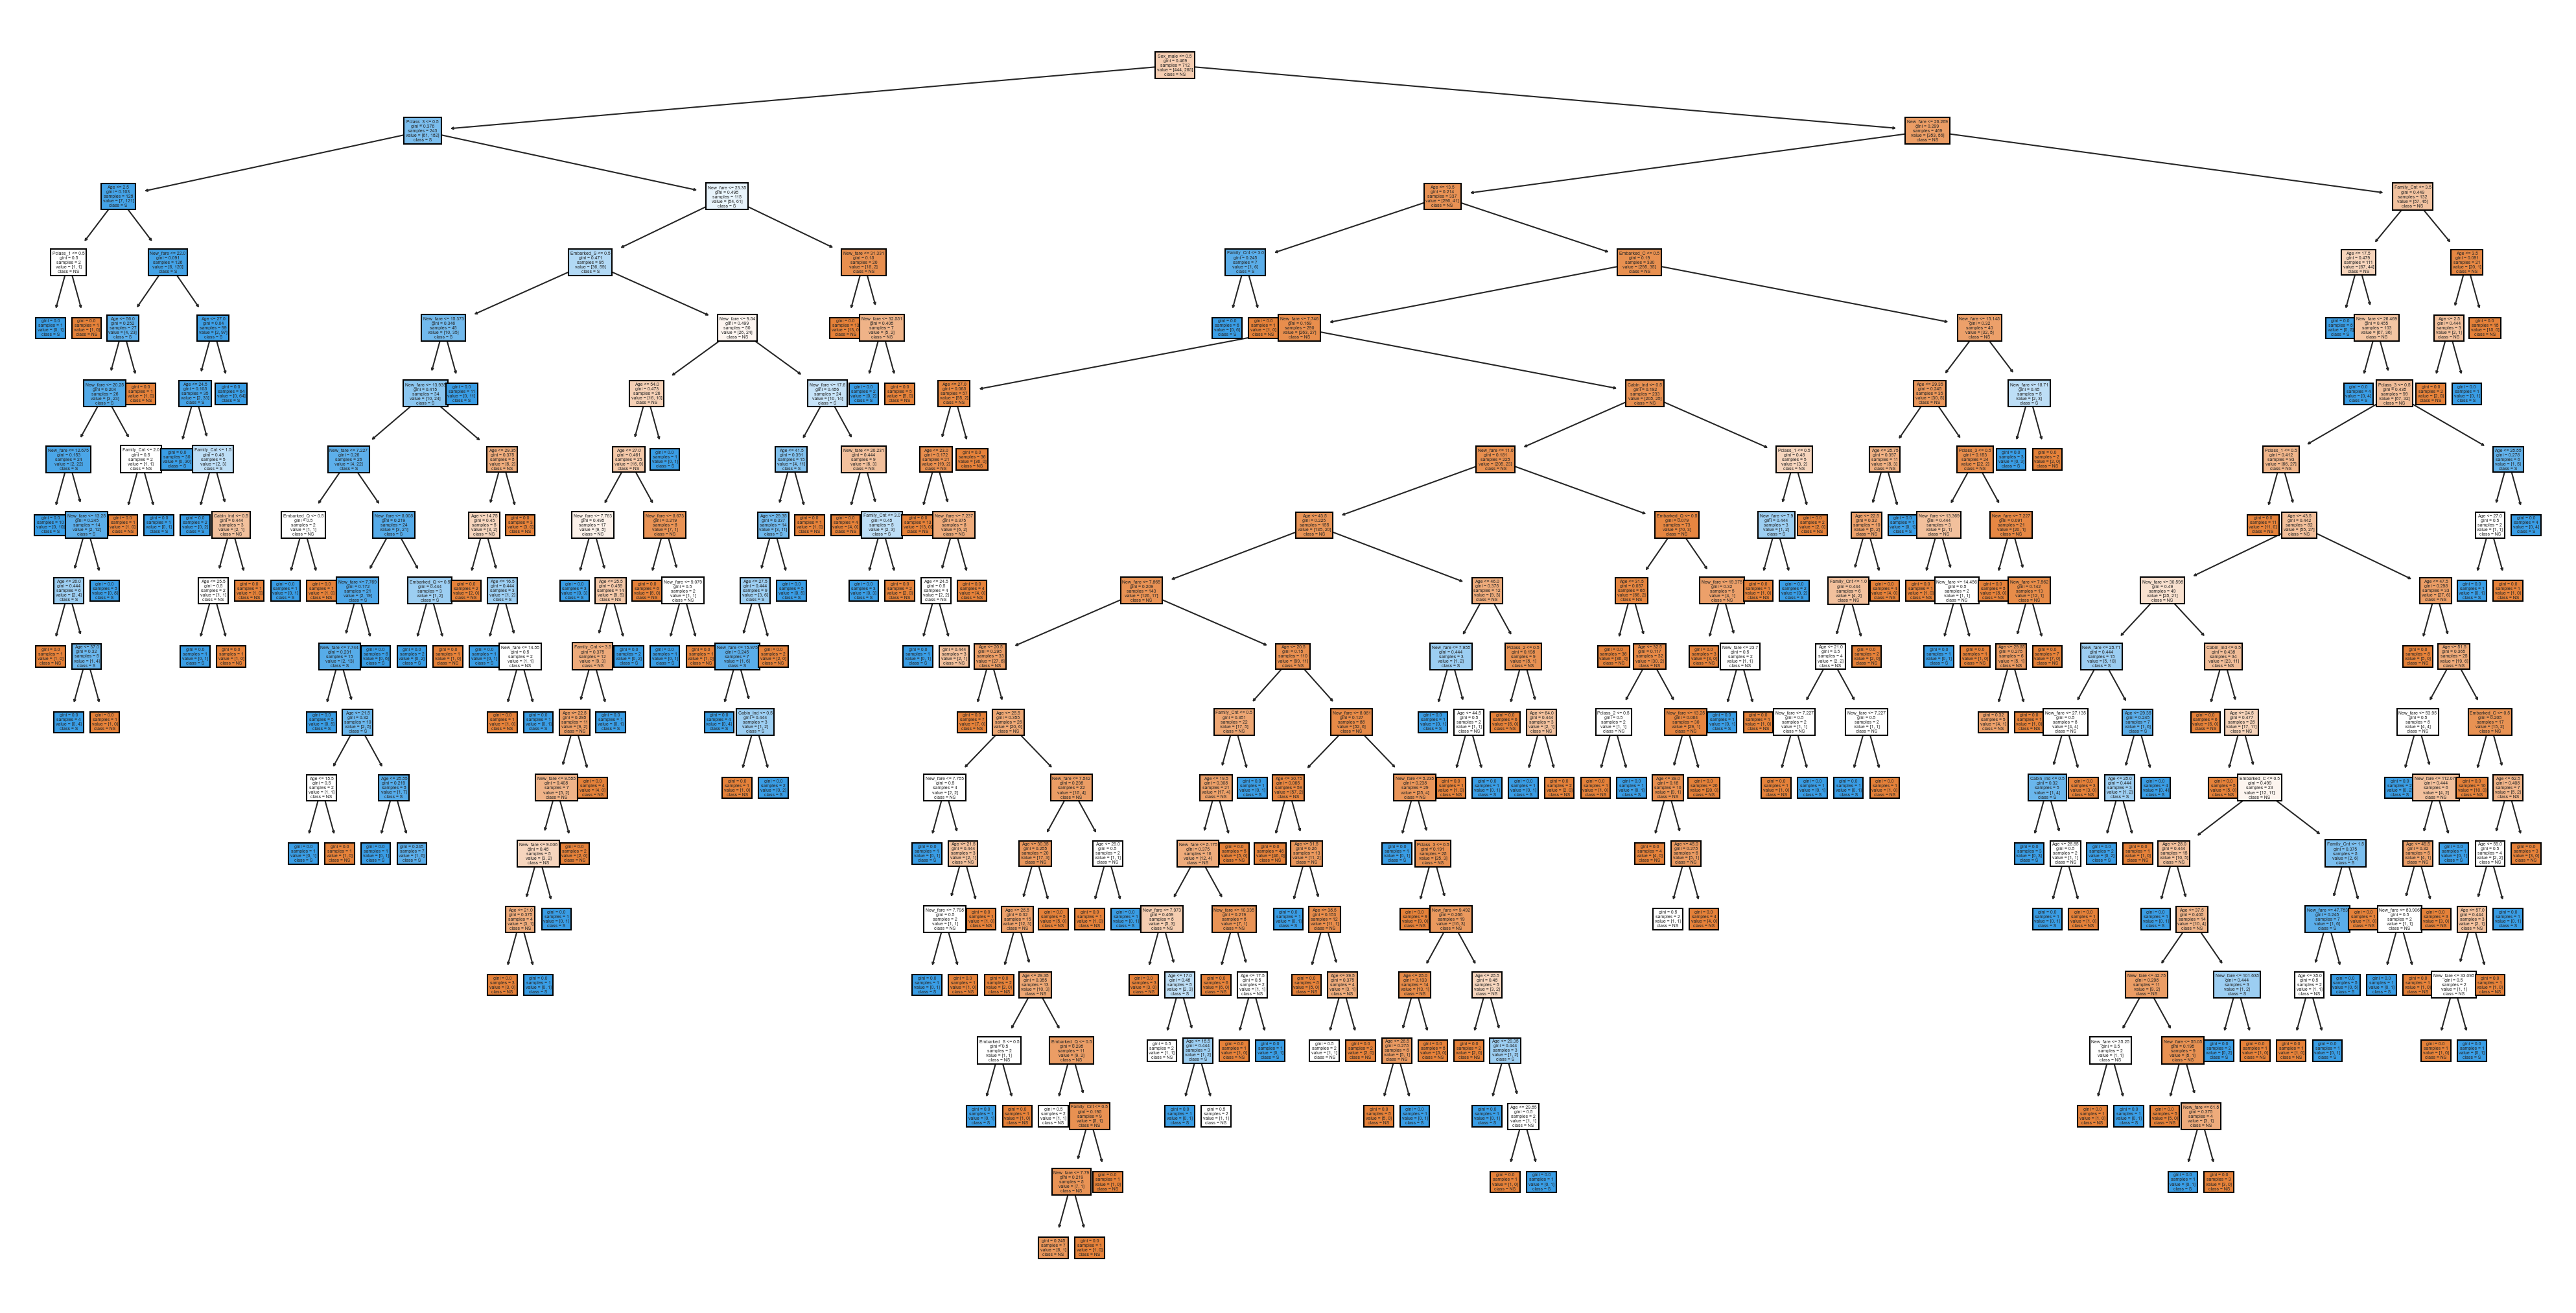

In [49]:
fig = plt.figure(figsize=(10,5), dpi = 500)
_ = plot_tree(fulltree, 
                   feature_names=X.columns,  
                   class_names=['NS', 'S'],
                   filled=True)

In [50]:
train_pred = fulltree.predict(X_train)
print(accuracy_score(y_train, train_pred))

0.9873595505617978


In [51]:
#predict for test data
pred_full = fulltree.predict(X_test)
print(accuracy_score(y_test, pred_full))

0.7877094972067039


## Small Tree

In [52]:
#Avoiding Overfitting
smallCtree = DecisionTreeClassifier(max_depth = 2, min_samples_split = 20, 
                                    min_impurity_decrease = 0.01, random_state = 0)
smallCtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01,
                       min_samples_split=20, random_state=0)

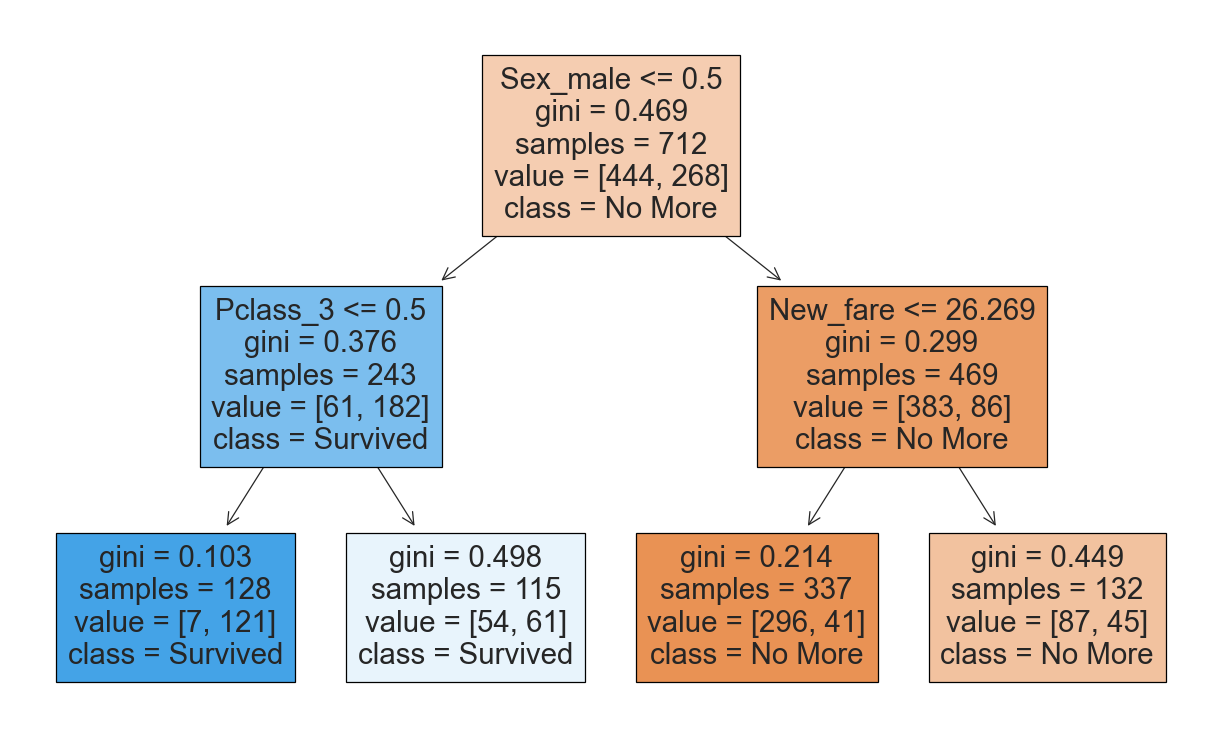

In [53]:
fig = plt.figure(figsize=(5,3), dpi = 300)
_ = plot_tree(smallCtree, 
                   feature_names=X.columns,  
                   class_names=['No More', 'Survived'],
                   filled=True)

In [54]:
#predict for test data
pred_small = smallCtree.predict(X_test)
print(accuracy_score(y_test, pred_small))

0.7597765363128491


## Hyperparameter Tuning Using GridSearchCV

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [56]:
#A funtion to print the gridsearch result
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [57]:
#start with an initial guess for params
param_grid = {
    'max_depth': [10,20,30, 40],
    'min_samples_split': [20,40,60,80,100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'criterion':['gini','entropy']
}

In [58]:
#Run Gridsearch
gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [59]:
print_results(gridsearch)

BEST PARAMS: {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}

0.798 (+/-0.05) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
0.795 (+/-0.026) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}
0.791 (+/-0.038) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 60}
0.806 (+/-0.05) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 80}
0.782 (+/-0.027) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 100}
0.799 (+/-0.05) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
0.795 (+/-0.026) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 40}
0.791 (+/-0.038) for {'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0

In [61]:
print('Initial score:', gridsearch.best_score_)
print('Initial parameters:', gridsearch.best_params_)

Initial score: 0.8188417216586231
Initial parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}


In [62]:
#adopt the params
param_grid = {
    'max_depth': [5,8,10,12],
    'min_samples_split': [10,20,30,40,50],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
    'criterion':['gini','entropy']
}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10, 12],
                         'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
                                                   0.01],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [63]:
print('Improved score:', gridsearch.best_score_)
print('Improved parameters:', gridsearch.best_params_)

Improved score: 0.8258347286516301
Improved parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 10}


In [64]:
#Take the best estimator
bestCtree = gridsearch.best_estimator_

In [65]:
predictions = bestCtree.predict(X_test)

In [66]:
print(accuracy_score(y_test, predictions))

0.8268156424581006


In [67]:
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[98  7]
 [24 50]]


In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       105
           1       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



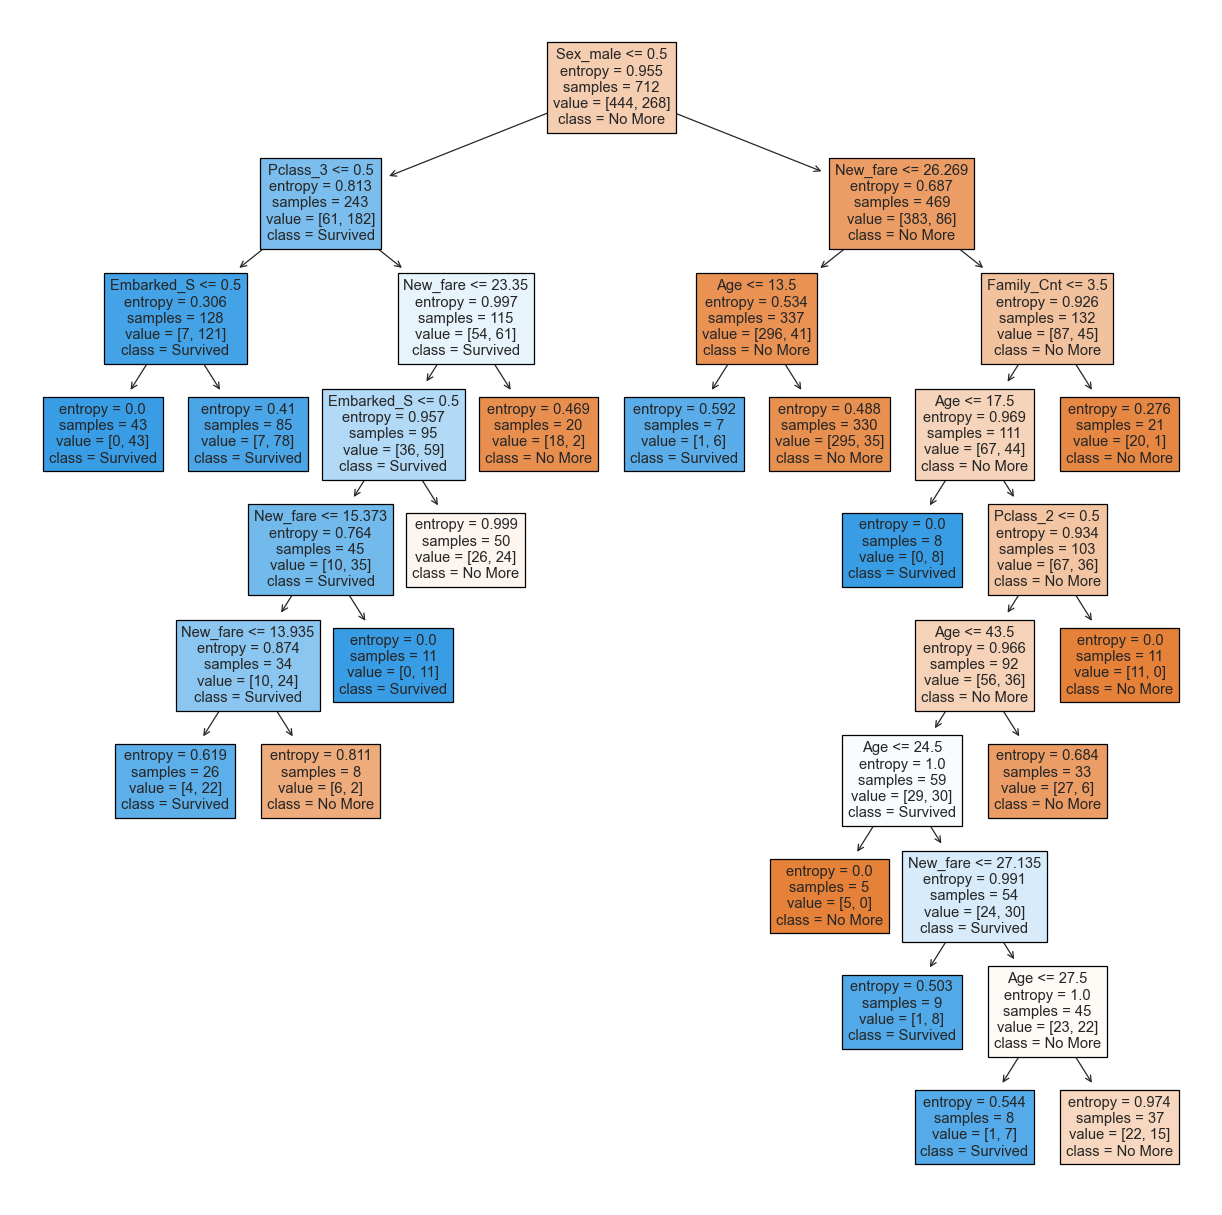

In [69]:
fig = plt.figure(figsize=(5,5), dpi = 300)
_ = plot_tree(bestCtree, 
                   feature_names=X.columns,  
                   class_names=['No More', 'Survived'],
                   filled=True)

### Post - Pruning (Cost Complexity Parameter)

In [70]:
#try ccp
param_grid = {
    "ccp_alpha":[0.001, 0.005, 0.01, 0.05, 0.1]
}

gridsearch_cp = GridSearchCV(DecisionTreeClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_cp.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1]})

In [71]:
print_results(gridsearch_cp)

BEST PARAMS: {'ccp_alpha': 0.01}

0.758 (+/-0.08) for {'ccp_alpha': 0.001}
0.795 (+/-0.048) for {'ccp_alpha': 0.005}
0.812 (+/-0.059) for {'ccp_alpha': 0.01}
0.793 (+/-0.063) for {'ccp_alpha': 0.05}
0.793 (+/-0.063) for {'ccp_alpha': 0.1}


In [72]:
print('CCP Score:', gridsearch_cp.best_score_)
print('CCP Parameters:', gridsearch_cp.best_params_)

CCP Score: 0.8117108243868808
CCP Parameters: {'ccp_alpha': 0.01}


In [73]:
#Take the best estimator
bestCtree_cp = gridsearch_cp.best_estimator_

In [74]:
pred_cp = bestCtree_cp.predict(X_test)

In [75]:
print(accuracy_score(y_test, pred_cp))

0.8212290502793296


In [76]:
cm = confusion_matrix(y_test, pred_cp)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[90 15]
 [17 57]]


In [77]:
print(classification_report(y_test, pred_cp))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



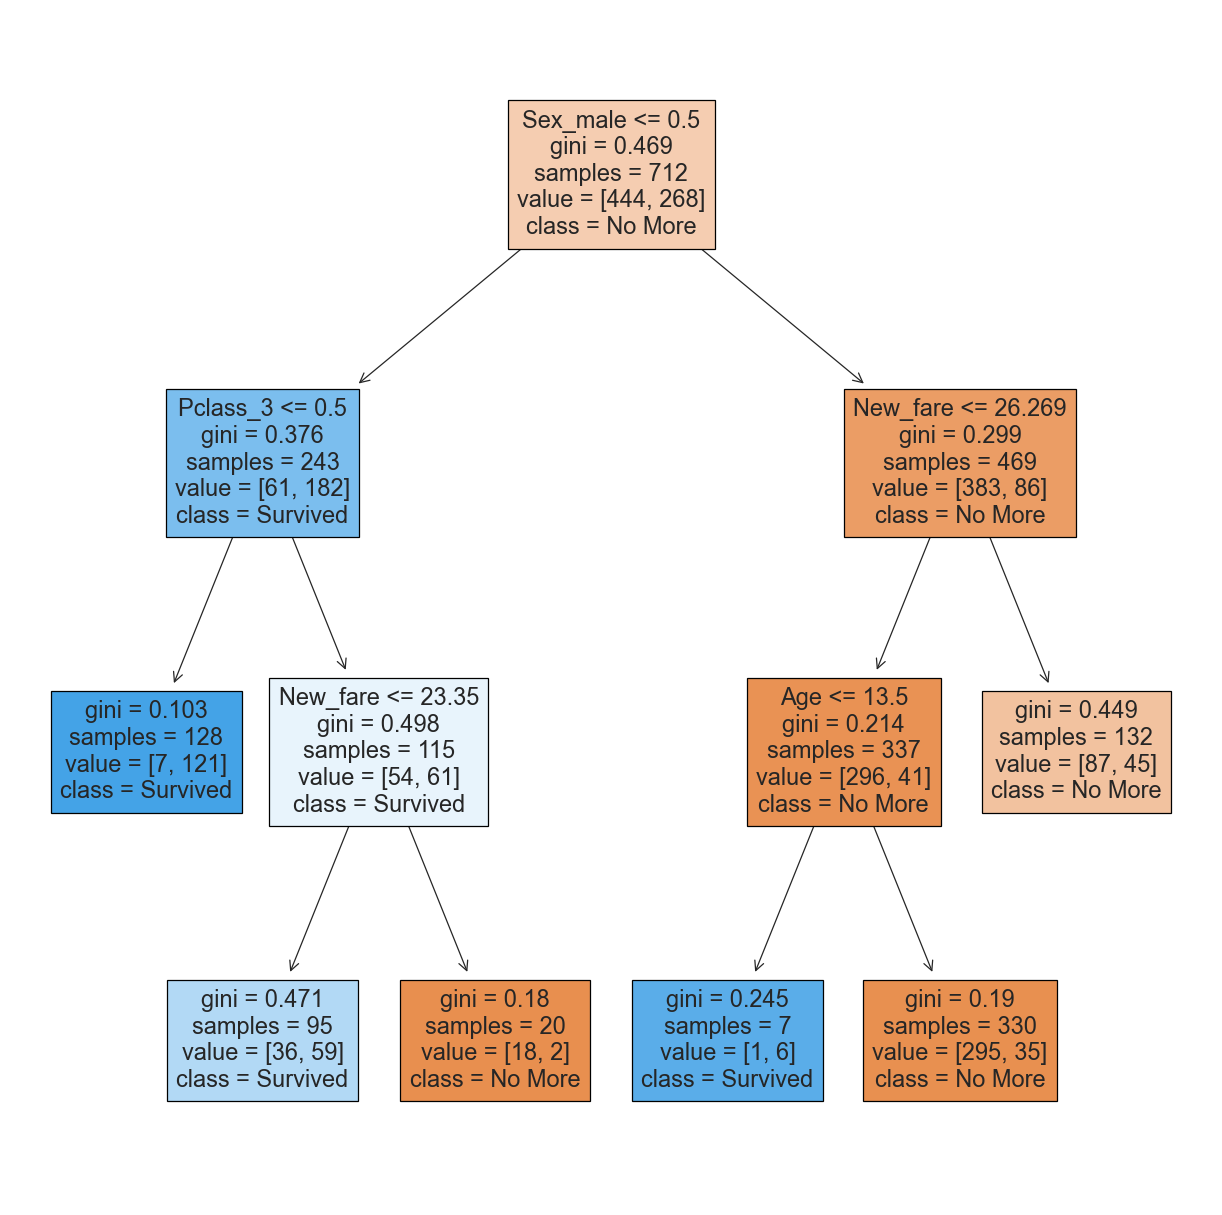

In [78]:
fig = plt.figure(figsize=(5,5), dpi = 300)
_ = plot_tree(bestCtree_cp, 
                   feature_names=X.columns,  
                   class_names=['No More', 'Survived'],
                   filled=True)

# Bagging & Boosting

## Voting

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [80]:
log_clf = LogisticRegression()
dtr_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)

In [81]:
voting_clf = ____(
    estimators = [('lr', log_clf),('dt',dtr_clf),('svc', svm_clf)],
    voting = 'soft',
    weights=[2,2,1]
)

In [82]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft', weights=[2, 2, 1])

In [103]:
for clf in voting_clf.named_estimators_:
    y_pred = voting_clf.named_estimators_[clf].predict(X_test)
    print(clf,":", accuracy_score(y_test, y_pred))

y_pred = voting_clf.predict(X_test)
print("Voting Clf: ", accuracy_score(y_test, y_pred))

lr : 0.7932960893854749
dt : 0.7988826815642458
svc : 0.6871508379888268
Voting Clf:  0.8100558659217877


In [105]:
#for clf in (log_clf, dtr_clf, svm_clf, voting_clf):
#    clf.fit(X_train, y_train)
#    y_pred = clf.predict(X_test)
#    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

## Bagging and Pasting in Scikit-learn

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [106]:
pst_clf = BaggingClassifier(
    ____, #The model that you want use
    n_estimators = ___, # Number of models to run
    max_samples= ___, #Number of samples for each model
    bootstrap = False, #True or False to choose between Bagging and pasting
    n_jobs = -1, 
    random_state = 0
)
pst_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=100, n_estimators=500, n_jobs=-1, random_state=0)

In [108]:
pst_pred = pst_clf.predict(X_test)

In [109]:
print(accuracy_score(y_test, pst_pred))

0.8212290502793296


In [110]:
#out-of-bag evaluation
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators = 500,
    max_samples=100, 
    bootstrap = True, 
    n_jobs = -1, 
    oob_score = ____, 
    random_state = 0
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True, random_state=0)

In [111]:
bag_clf.oob_score_

0.8202247191011236

In [112]:
bag_pred = bag_clf.predict(X_test)

In [113]:
print(accuracy_score(y_test, bag_pred))

0.8324022346368715


# Random Forest

In [114]:
from sklearn.ensemble import ____ #RandomForestClassifier

In [115]:
rnd_clf = ____(
    n_estimators = 500,
    max_depth = 10,
    n_jobs = -1,
    random_state = 0
)

In [116]:
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [117]:
rf_pred = rnd_clf.predict(X_test)

In [118]:
print(accuracy_score(y_test, rf_pred))

0.8324022346368715


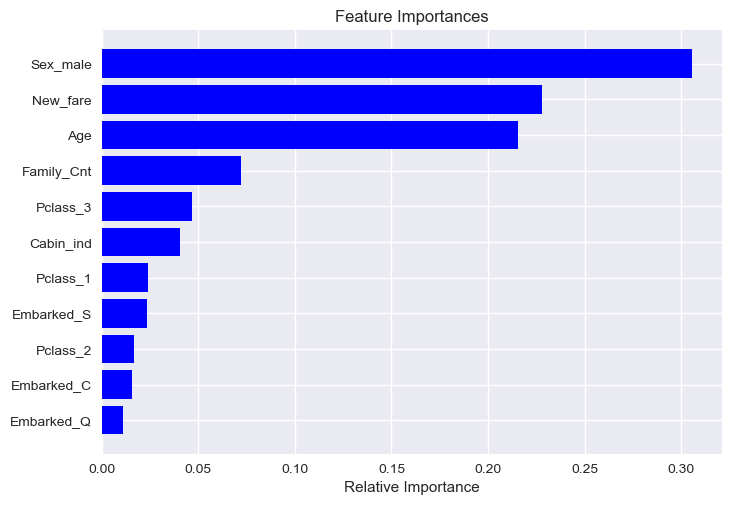

In [119]:
features = X_test.columns
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [120]:
#try ccp
param_grid = {
    "max_depth":[5, 7, 8, 10, 12, 14, 15],
    "n_estimators":[50,75,100,150,200,300,400,500]
}

gridsearch_rf = GridSearchCV(
                        RandomForestClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 8, 10, 12, 14, 15],
                         'n_estimators': [50, 75, 100, 150, 200, 300, 400,
                                          500]})

In [121]:
print_results(gridsearch_rf)

BEST PARAMS: {'max_depth': 7, 'n_estimators': 400}

0.819 (+/-0.059) for {'max_depth': 5, 'n_estimators': 50}
0.822 (+/-0.062) for {'max_depth': 5, 'n_estimators': 75}
0.823 (+/-0.061) for {'max_depth': 5, 'n_estimators': 100}
0.824 (+/-0.059) for {'max_depth': 5, 'n_estimators': 150}
0.82 (+/-0.05) for {'max_depth': 5, 'n_estimators': 200}
0.824 (+/-0.059) for {'max_depth': 5, 'n_estimators': 300}
0.823 (+/-0.052) for {'max_depth': 5, 'n_estimators': 400}
0.823 (+/-0.052) for {'max_depth': 5, 'n_estimators': 500}
0.822 (+/-0.037) for {'max_depth': 7, 'n_estimators': 50}
0.826 (+/-0.041) for {'max_depth': 7, 'n_estimators': 75}
0.827 (+/-0.037) for {'max_depth': 7, 'n_estimators': 100}
0.826 (+/-0.032) for {'max_depth': 7, 'n_estimators': 150}
0.824 (+/-0.033) for {'max_depth': 7, 'n_estimators': 200}
0.824 (+/-0.034) for {'max_depth': 7, 'n_estimators': 300}
0.827 (+/-0.035) for {'max_depth': 7, 'n_estimators': 400}
0.827 (+/-0.035) for {'max_depth': 7, 'n_estimators': 500}
0.819 (+/-

In [122]:
print('CCP Score:', gridsearch_rf.best_score_)
print('CCP Parameters:', gridsearch_rf.best_params_)

CCP Score: 0.8272136314389836
CCP Parameters: {'max_depth': 7, 'n_estimators': 400}


In [123]:
#Take the best estimator
bestCtree_rf = gridsearch_rf.best_estimator_

In [124]:
pred_rf = bestCtree_rf.predict(X_test)

In [103]:
print(accuracy_score(y_test, pred_rf))

0.8268156424581006


In [125]:
cm = confusion_matrix(y_test, pred_rf)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[93 12]
 [19 55]]


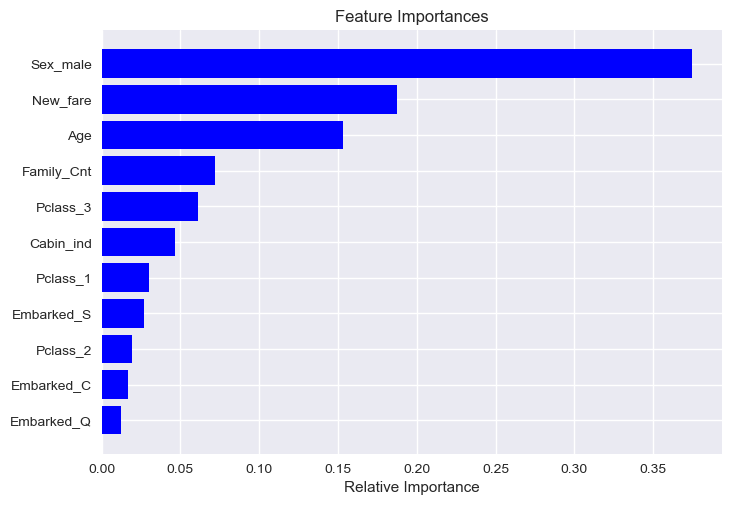

In [126]:
features = X_test.columns
importances = bestCtree_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Extra-Trees

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

In [128]:
ext_clf = ____(
    n_estimators = 500,
    max_depth = 10,
    n_jobs = -1,
    random_state = 0
)

In [129]:
ext_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1, random_state=0)

In [130]:
ext_pred = ext_clf.predict(X_test)

In [131]:
print(accuracy_score(y_test, ext_pred))

0.8100558659217877


## Boosting

### Adaboost

In [132]:
from sklearn.ensemble import AdaBoostClassifier

In [133]:
ada_clf = _____(
    DecisionTreeClassifier(max_depth = 1), 
    n_estimators = 200,
    learning_rate = 0.05,
    random_state = 0
)

In [134]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.05, n_estimators=200, random_state=0)

In [135]:
ada_pred = ada_clf.predict(X_test)

In [136]:
print(accuracy_score(y_test, ada_pred))

0.8156424581005587


In [137]:
#try ccp
param_grid = {
    "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators":[50,75,100,150,200]
}

gridsearch_ada = GridSearchCV(
                        AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), 
                            random_state = 0),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2,
                                           0.3],
                         'n_estimators': [50, 75, 100, 150, 200]})

In [138]:
print_results(gridsearch_ada)

BEST PARAMS: {'learning_rate': 0.05, 'n_estimators': 150}

0.793 (+/-0.063) for {'learning_rate': 0.001, 'n_estimators': 50}
0.793 (+/-0.063) for {'learning_rate': 0.001, 'n_estimators': 75}
0.793 (+/-0.063) for {'learning_rate': 0.001, 'n_estimators': 100}
0.793 (+/-0.063) for {'learning_rate': 0.001, 'n_estimators': 150}
0.793 (+/-0.063) for {'learning_rate': 0.001, 'n_estimators': 200}
0.793 (+/-0.063) for {'learning_rate': 0.005, 'n_estimators': 50}
0.793 (+/-0.063) for {'learning_rate': 0.005, 'n_estimators': 75}
0.793 (+/-0.063) for {'learning_rate': 0.005, 'n_estimators': 100}
0.793 (+/-0.063) for {'learning_rate': 0.005, 'n_estimators': 150}
0.793 (+/-0.063) for {'learning_rate': 0.005, 'n_estimators': 200}
0.793 (+/-0.063) for {'learning_rate': 0.01, 'n_estimators': 50}
0.793 (+/-0.063) for {'learning_rate': 0.01, 'n_estimators': 75}
0.793 (+/-0.063) for {'learning_rate': 0.01, 'n_estimators': 100}
0.793 (+/-0.063) for {'learning_rate': 0.01, 'n_estimators': 150}
0.793 (+/-0.0

In [139]:
print('CCP Score:', gridsearch_ada.best_score_)
print('CCP Parameters:', gridsearch_ada.best_params_)

CCP Score: 0.8117206736925047
CCP Parameters: {'learning_rate': 0.05, 'n_estimators': 150}


In [140]:
#Take the best estimator
bestCtree_ada = gridsearch_ada.best_estimator_

In [141]:
pred_ada = bestCtree_ada.predict(X_test)

In [142]:
print(accuracy_score(y_test, pred_ada))

0.8156424581005587


In [143]:
cm = confusion_matrix(y_test, pred_ada)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[89 16]
 [17 57]]


### XGBoost

In [152]:
#!pip install xgboost
from ____ import XGBClassifier

In [153]:
xgb_clf = XGBClassifier()

In [154]:
xgb_clf.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 2)

[0]	validation_0-logloss:0.56327
[1]	validation_0-logloss:0.49848
[2]	validation_0-logloss:0.46564
[3]	validation_0-logloss:0.44598
[4]	validation_0-logloss:0.43287
[5]	validation_0-logloss:0.42057
[6]	validation_0-logloss:0.41732
[7]	validation_0-logloss:0.41545
[8]	validation_0-logloss:0.41419


[9]	validation_0-logloss:0.41389
[10]	validation_0-logloss:0.41298
[11]	validation_0-logloss:0.41056
[12]	validation_0-logloss:0.40939
[13]	validation_0-logloss:0.40711
[14]	validation_0-logloss:0.41034


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
xgb_pred = xgb_clf.predict(X_test)

In [156]:
print(accuracy_score(y_test, xgb_pred))

0.8212290502793296


In [157]:
#try ccp
param_grid = {
    "learning_rate":[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
}

gridsearch_XGB = GridSearchCV(XGBClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max

In [158]:
print_results(gridsearch_XGB)

BEST PARAMS: {'learning_rate': 0.1}

0.806 (+/-0.051) for {'learning_rate': 0.001}
0.806 (+/-0.037) for {'learning_rate': 0.005}
0.81 (+/-0.024) for {'learning_rate': 0.01}
0.816 (+/-0.046) for {'learning_rate': 0.05}
0.817 (+/-0.044) for {'learning_rate': 0.1}
0.808 (+/-0.019) for {'learning_rate': 0.2}
0.808 (+/-0.035) for {'learning_rate': 0.3}


In [159]:
#try ccp
param_grid = {
    "learning_rate": np.arange(0.05, 0.2, 0.01)
}

gridsearch_XGB = GridSearchCV(XGBClassifier(random_state = 1),
                         param_grid,
                         cv = 5,
                         n_jobs = -1)
gridsearch_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [160]:
print_results(gridsearch_XGB)

BEST PARAMS: {'learning_rate': 0.08000000000000002}

0.816 (+/-0.046) for {'learning_rate': 0.05}
0.816 (+/-0.05) for {'learning_rate': 0.060000000000000005}
0.817 (+/-0.044) for {'learning_rate': 0.07}
0.819 (+/-0.044) for {'learning_rate': 0.08000000000000002}
0.817 (+/-0.036) for {'learning_rate': 0.09000000000000001}
0.817 (+/-0.044) for {'learning_rate': 0.1}
0.813 (+/-0.033) for {'learning_rate': 0.11000000000000001}
0.817 (+/-0.032) for {'learning_rate': 0.12000000000000001}
0.81 (+/-0.027) for {'learning_rate': 0.13}
0.813 (+/-0.034) for {'learning_rate': 0.14}
0.808 (+/-0.033) for {'learning_rate': 0.15000000000000002}
0.803 (+/-0.048) for {'learning_rate': 0.16000000000000003}
0.812 (+/-0.028) for {'learning_rate': 0.17000000000000004}
0.808 (+/-0.033) for {'learning_rate': 0.18000000000000005}
0.812 (+/-0.055) for {'learning_rate': 0.19}
0.808 (+/-0.019) for {'learning_rate': 0.2}


In [161]:
print('CCP Score:', gridsearch_XGB.best_score_)
print('CCP Parameters:', gridsearch_XGB.best_params_)

CCP Score: 0.8188121737417513
CCP Parameters: {'learning_rate': 0.08000000000000002}


In [162]:
#Take the best estimator
bestCtree_XGB = gridsearch_XGB.best_estimator_

In [163]:
pred_XGB = bestCtree_XGB.predict(X_test)

In [164]:
print(accuracy_score(y_test, pred_XGB))

0.8156424581005587


In [165]:
cm = confusion_matrix(y_test, pred_XGB)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[93 12]
 [21 53]]


# Choosing Best Model

In [166]:
for mdl in [lr_model, bestCtree, bestCtree_cp, voting_clf, bestCtree_rf, ext_clf, bestCtree_ada, bestCtree_XGB]:
    y_pred = mdl.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    print('mdl: {} / # -- A: {} / P: {} / R: {}'.format(mdl.__class__.__name__,  accuracy,
                                                                         precision,
                                                                         recall))

mdl: LogisticRegression / # -- A: 0.793 / P: 0.776 / R: 0.703
mdl: DecisionTreeClassifier / # -- A: 0.827 / P: 0.877 / R: 0.676
mdl: DecisionTreeClassifier / # -- A: 0.821 / P: 0.792 / R: 0.77
mdl: VotingClassifier / # -- A: 0.81 / P: 0.803 / R: 0.716
mdl: RandomForestClassifier / # -- A: 0.827 / P: 0.821 / R: 0.743
mdl: ExtraTreesClassifier / # -- A: 0.81 / P: 0.794 / R: 0.73
mdl: AdaBoostClassifier / # -- A: 0.816 / P: 0.781 / R: 0.77
mdl: XGBClassifier / # -- A: 0.816 / P: 0.815 / R: 0.716


# Stacking 

In [167]:
from sklearn.ensemble import StackingClassifier

stacking_clf = _____(
    estimators = [('dt', bestCtree),('rf',bestCtree_rf),('xgb', bestCtree_XGB)],
    final_estimator=LogisticRegression()
)

In [168]:
stacking_clf.fit(X_train, y_train).score(X_test, y_test)

0.8156424581005587

# Final Model

In [170]:
bestCtree_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=7, n_estimators=400, random_state=1)>

In [171]:
final_model =  RandomForestClassifier(max_depth=7, n_estimators=400, random_state=1)
final_model.fit(X, y)

RandomForestClassifier(max_depth=7, n_estimators=400, random_state=1)

In [176]:
final_model.score(X, y)

0.8967452300785634

## Save & Load Your Best Model

In [172]:
#Saving any model
import joblib
joblib.dump(final_model, 'Best_model.pkl')

['Best_model.pkl']

In [174]:
#Loading a model
mymodel = joblib.load('Best_model.pkl')

In [175]:
mymodel.predict(X_test)

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)